### Model predictions

In this notebook, we will make predictions using the model we trained in the previous notebook. We will also evaluate the model's performance.



### 1 - First, we load the test data


In [17]:
import pandas as pd

X = pd.read_csv('../src/data/processed/X_test.csv')
y = pd.read_csv('../src/data/processed/y_test.csv')


In [18]:
#load column names from json file
import json

with open('../src/data/processed/features.json') as f:
    columns_name = json.load(f)
    f.close()


In [19]:
#declare target column name
target_col = 'views'

# X = df.drop(target_col, axis=1)
X = X[columns_name]
y = y[target_col]


In [20]:
#create a function to calculate the accuracy of the model

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from imblearn.metrics import specificity_score

def model_evaluation(model, X, y):
    """
    This function takes a model, X and y and returns all classification metrics
    """
    results = []
    y_pred = model.predict(X)
    accuracy = accuracy_score(y, y_pred)
    recall = recall_score(y, y_pred, average='weighted')
    specificity = specificity_score(y, y_pred, average='weighted')
    fp_rate = 1 - specificity
    precision = precision_score(y, y_pred, average='weighted')
    f1 = f1_score(y, y_pred, average='weighted')
    print('Accuracy: ', accuracy)
    print('Recall: ', recall)
    print('Specificity: ', specificity)
    print('False Positive Rate: ', fp_rate)
    print('Precision: ', precision)
    print('F1 Score: ', f1)
    




In [21]:
# load the model
import pickle
import gzip

best_model = pickle.load(gzip.open('../src/data/model/best_model.pkl.gz', 'rb'))

# evaluate the model
model_evaluation(best_model, X, y)


Accuracy:  0.7088772845953003
Recall:  0.7088772845953003
Specificity:  0.7088772845953003
False Positive Rate:  0.2911227154046997
Precision:  0.7102103647293903
F1 Score:  0.708415002242561


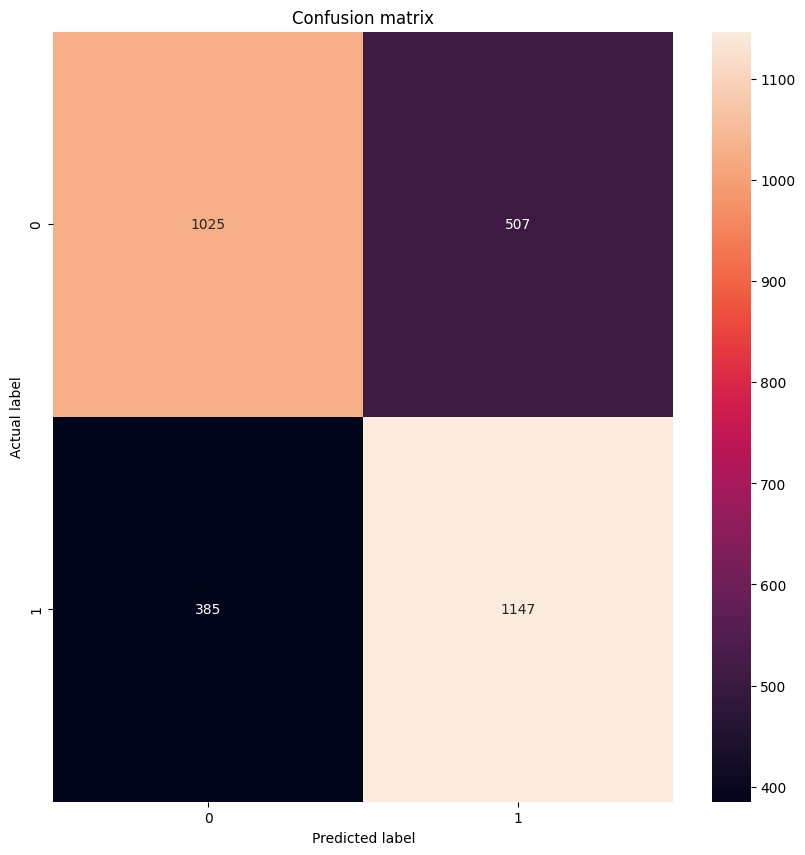

In [22]:

#plot the confusion matrix
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

y_pred = best_model.predict(X)
cm = confusion_matrix(y, y_pred)
plt.figure(figsize=(10, 10))
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Confusion matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()



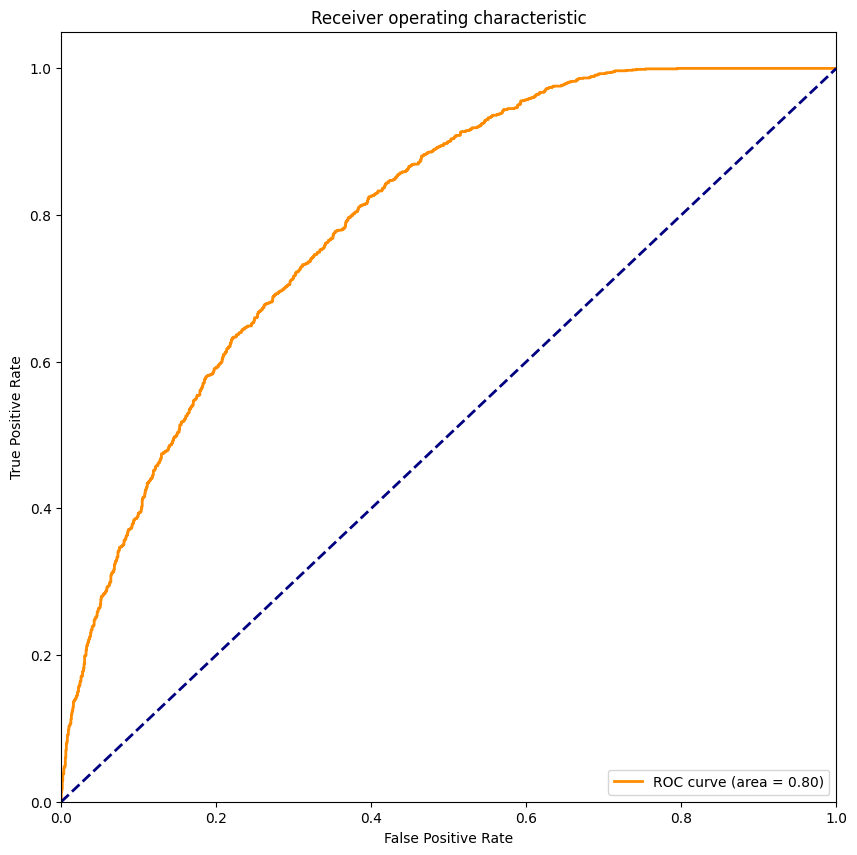

In [23]:
#plot the ROC curve

from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

y_pred = best_model.predict(X)
y_pred_proba = best_model.predict_proba(X)[:, 1]

fpr, tpr, thresholds = roc_curve(y, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10, 10))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()
